# Compensazione Isostatica di Airy - Alexia Stefanelli

La compensazione isostatica di Airy è un modello teorico che spiega come la crosta terrestre si solleva o si abbassa in risposta alle variazioni di carico. In questa relazione, esamineremo il concetto di compensazione isostatica di Airy e ne analizzeremo gli effetti utilizzando dati di esempio.


## Librerie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import Image

## Introduzione

L’**isostasia** è un principio geologico secondo il quale l’eccesso di massa del rilievo topografico è in parte compensato dalla ridotta massa del sottostrato; quindi è una compensazione topografica che avviene per mezzo di una struttura meno densa sotto la superficie. 

Abbiamo due diversi modelli isostatici che assumono una compensazione locale:
- Il **modello di Pratt-Hayford** spiega che la profondità della crosta è costante e ha un determinato spessore d, tuttavia la sua densità p1, varia orizzontalmente e risulta inferiore al di sotto di catene montuose, secondo questo modello le rocce della crosta formano uno strato non omogeneo e possiamo identificare queste rocce come dei pilastri affiancati che però hanno una densità diversa tra di loro.

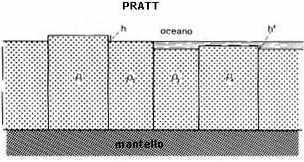

In [2]:
Image("img/iso-pratt.jpg",width=350)


- Il **modello di Airy-heiskanen** spiega che la massa ridotta che si trova al di sotto della superficie è associata ad uno spessore eccessivo della crosta occupante la profondita che normalmente è occupata dal mantello. La scarsita di questa massa in profondità è compensata esattamente dall’eccessiva massa presente al di sopra del livello del mare. 

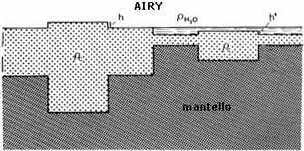

In [3]:
Image("img/iso-airy.jpg",width=350)

## Compensazione isostatica di Airy

Lo spessore che si trova al di sotto della crosta è maggiore rispetto allo spessore della crosta sopra il livello del mare, quindi della montagna, perché la differenza di densità tra la montagna e l’aria è maggiore rispetto alla differenza di densita tra lo spessore della crosta e la densità del mantello; ciò determina un’altezza inferiore della montagna rispetto all’eccessivo ispessimento della crosta sottostante.

Si ricava quindi per lo spessore eccessivo della crosta: 
$$ r_i = h_i \frac{\rho_{upper}}{\rho_{mantle}-\rho_{lower}} $$

Dove:
- $h$ è lo spessore della crosta al di sopra del livello del mare assunta per semplicità di elevazione uniforme;
- $r$ è lo spessore della crosta al di sotto della normale discontinuità crosta-mantello;
- $\rho_{upper}$ è la densità della crosta al di sopra del livello del mare;
- $\rho_{lower}$ è la densità della crosta al di sotto del livello del mare;
- $\rho_{mantle}$ è la densità del mantello;

## Dati
Consideriamo la zona delle **Alpi Orientali** e ne calcoliamo la compensazione isostatica basandoci su densità e spessore della crosta sopra e sotto il livello del mare.

Reading data for profile: Alps




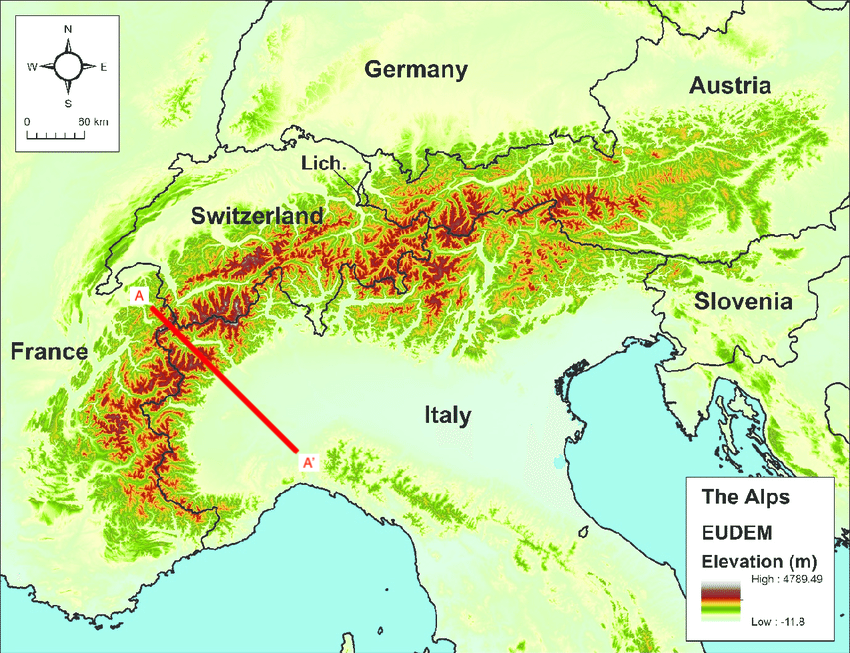

In [10]:
label='Alps'
print('Reading data for profile:', label)
print("\n")
topo_file='data/ALPS.topo'
moho_file='data/ALPS.moho'
START_LAB='A'
END_LAB='A\''
CLAT=46.5
CLON=6.5
ELAT=44.88
ELON=8.74
LEN=250
# Additional parameters
Average_crust_thick=35   # Spessore crostale medio in kilometri
rho_upper = 2800
rho_mantle= 3400.0  # Densita'del mantello (kg/m3)  -- Olivina/Eclogite: 3.3 - 3.5 g/cm³ 
rho_lower = 2700

Image("img/alp-elevation.png", width=500)

## Analisi

### 1. Spessore crostale della topografia lungo le alpi in caso di compensazione di Airy

Calcoliamo la profondita' necessaria per compensare la topografia lungo le Alpi Orientali, adottando una compensazione di Airy. Assumiamo che l'asse $x$ del sistema sia il profilo su cui calcoliamo le variazioni di spessore crostale. Il profilo e' lungo circa 200 kilometri. Per ogni 10 km dep profilo, calcoliamo lo spessore delle radici con la formula:

$$ r_i = h_i \frac{\rho_{upper}}{\rho_{mantle}-\rho_{lower}} $$


<Figure size 640x480 with 0 Axes>

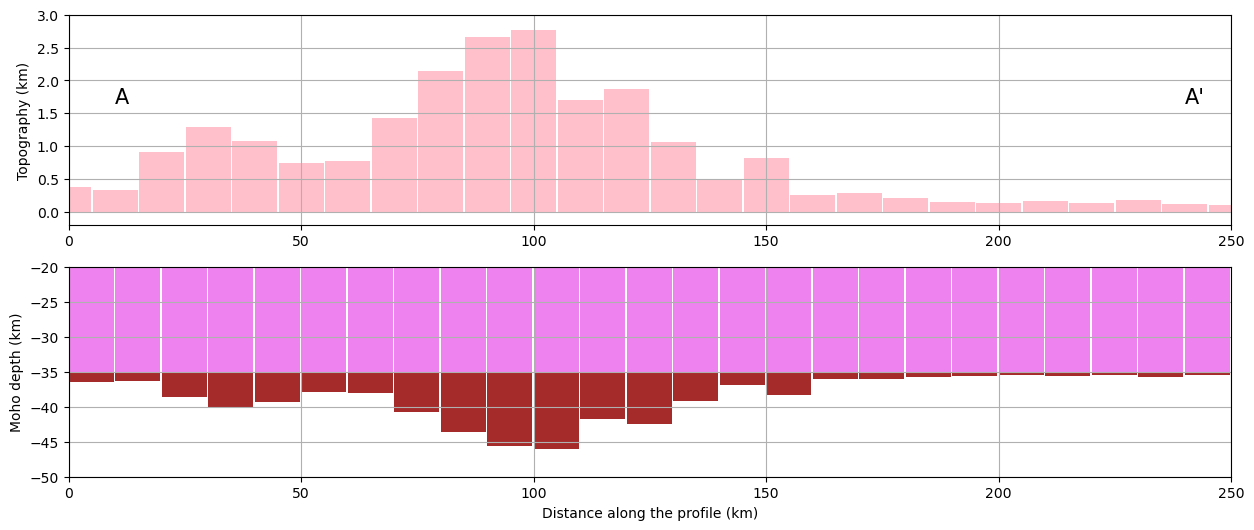

<Figure size 640x480 with 0 Axes>

In [11]:
#Prendiamo i dati  della topografia lungo il profilo
statfile = open(topo_file, 'r')
km = []
topo = []
nstat=0
linestoken=statfile.readlines()
for x in linestoken:
    nstat+=1 
    km0=float(x.split()[2])
    topo0=float(x.split()[3])/1000
    km.append(km0)
    topo.append(topo0)

c = []
r = []
x=0
i=0
crust = -1.0 * Average_crust_thick
while i < nstat:
    topo0=topo[i]
    r0 = crust -1.0 * topo0 * rho_upper/(rho_mantle-rho_lower)
    c.append(crust)
    r.append(r0)
    i+=1

fig, (ax1,ax2) = plt.subplots(2,figsize=(15,6))
ax1.bar(km, topo, color ='pink', width = 9.7)
ax1.grid()
ax1.set_ylabel('Topography (km)')
ax1.set_xlim(0,LEN)
ax1.set_ylim(-0.2,3)
ax1.text(10, 1.65, START_LAB , fontsize=15)
ax1.text(LEN-10, 1.65, END_LAB , fontsize=15)  
ax2.grid()
istat=0
while istat < nstat:
    x1=km[istat]
    depth1=r[istat]
    rect1 = patches.Rectangle((x1, depth1), 9.7, 30, facecolor='brown')
    ax2.add_patch( rect1 )
    rect2 = patches.Rectangle((x1, crust), 9.7, 30, facecolor='violet')
    ax2.add_patch( rect2 )
    istat+=1
        
    
ax2.set_ylabel('Moho depth (km)')
ax2.set_xlabel('Distance along the profile (km)')
ax2.set_xlim(0,LEN)
ax2.set_ylim(-50,-20)
plt.figure()

## 2. Confrontare lo spessore crostale ricavato dal punto (1) con lo spessore crostale osservato

Adesso ripetiamo l'esperimento fatto al punto (1) confrontando la moho che abbiamo stimato dai calcoli con la moho effettivamente osservata nella zona. 

<Figure size 640x480 with 0 Axes>

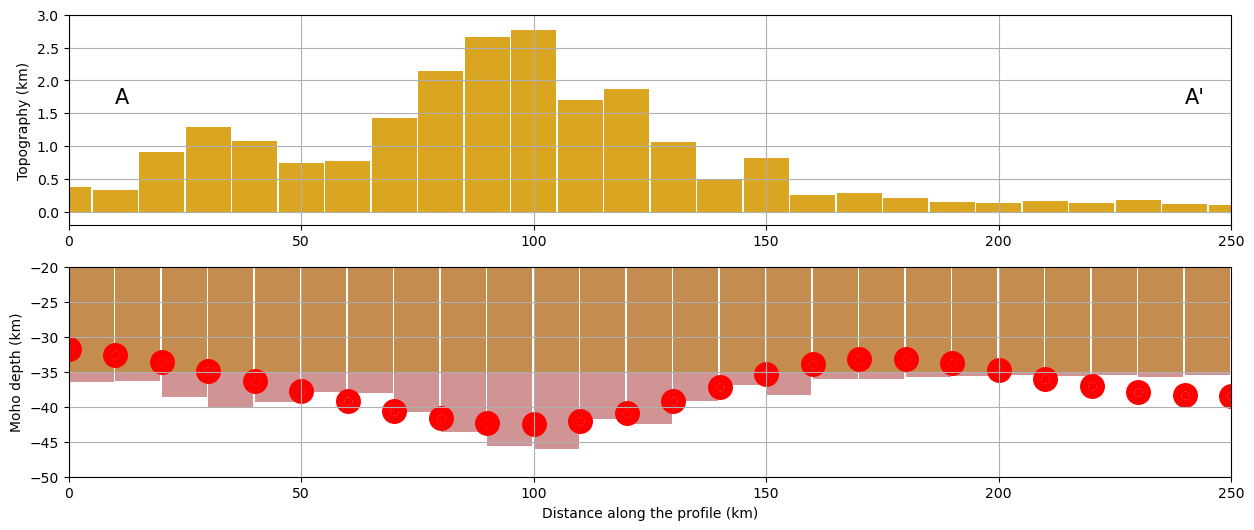

<Figure size 640x480 with 0 Axes>

In [13]:
#Prendiamo i dati  della topografia lungo il profilo
statfile = open(topo_file, 'r')
km = []
topo = []
linestoken=statfile.readlines()
nstat=0
for x in linestoken:
    nstat+=1 
    km0=float(x.split()[2])
    topo0=float(x.split()[3])/1000
    km.append(km0)
    topo.append(topo0)
    #print(nstat,km0,topo0)

#Prendiamo i dati  della profondita' della Moho lungo il profilo
statfile = open(moho_file, 'r')
km = []
moho = []
linestoken=statfile.readlines()
nstat=0
for x in linestoken:
    nstat+=1 
    km0=float(x.split()[2])
    moho0= -1.0 * float(x.split()[3])
    km.append(km0)
    moho.append(moho0)
    #print(nstat,km0,moho0)

c = []
r = []
x=0
i=0
crust = -1.0 * Average_crust_thick
while i < nstat:
    topo0=topo[i]
    r0 = crust -1.0 * topo0 * rho_upper/(rho_mantle-rho_lower)
    c.append(crust)
    r.append(r0)
    i+=1

fig, (ax1,ax2) = plt.subplots(2,figsize=(15,6))
ax1.bar(km, topo, color ='goldenrod', width = 9.7)
ax1.grid()
ax1.set_ylabel('Topography (km)')
ax1.set_xlim(0,LEN)
ax1.set_ylim(-0.2,3)
ax1.text(10, 1.65, START_LAB , fontsize=15)
ax1.text(LEN-10, 1.65, END_LAB , fontsize=15)  
ax2.grid()
istat=0

while istat < nstat:
    x1=km[istat]
    depth1=r[istat]
    moho1=moho[istat]
        
    rect1 = patches.Rectangle((x1, depth1), 9.7, 30, facecolor='brown', alpha=0.5)
    ax2.add_patch( rect1 )
    rect2 = patches.Rectangle((x1, crust), 9.7, 30, facecolor='darkgoldenrod', alpha=0.5)
    ax2.add_patch( rect2 )
    ax2.scatter(x1,moho1,marker='o',facecolor='red', linewidths=12)
    istat+=1
    
ax2.set_ylabel('Moho depth (km)')
ax2.set_xlabel('Distance along the profile (km)')
ax2.set_xlim(0,LEN)
ax2.set_ylim(-50,-20)
plt.figure()

## 3. Analisi della correlazione tra spessore crostale e altre osservazioni geofisiche.

Possiamo ora confrontare il nostro risultato (spessore crostale dovuto a compensazione di Airy) con altri osservabili geofisici raccolti nell' areale italiano. Sara' interessante notare dove sovra-compensazioni e sotto-compensazioni si correlano con fenomeni quali: sismicita', flusso di calore e anomalia di gravità.

### Anomalie di gravità

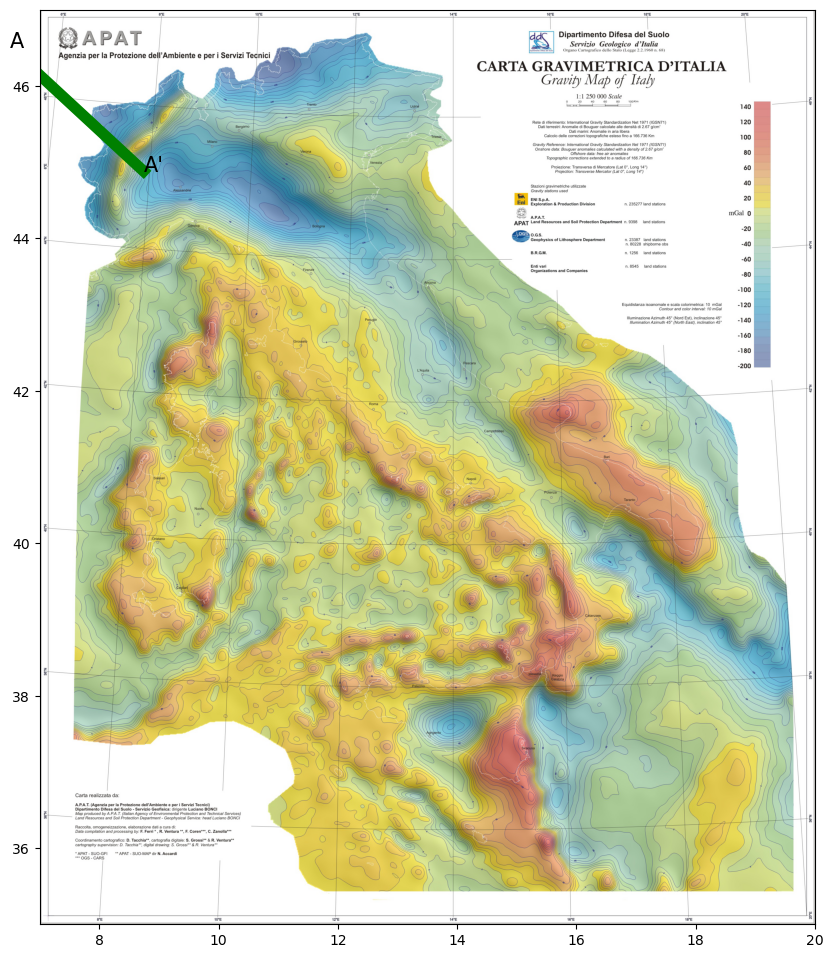

In [15]:
LON = [CLON,ELON]
LAT = [CLAT,ELAT]

im = plt.imread("img/grav_ita.jpg")
plt.figure(figsize=(10,12))
xmin, xmax, ymin, ymax = (7, 20, 35, 47)
aspect = im.shape[0] / im.shape[1] * (xmax - xmin)/(ymax - ymin)
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)
plt.xlim(7,20)
plt.ylim(35,47)

plt.plot(LON, LAT, color='green', linewidth=8)
plt.text(CLON, CLAT, START_LAB, fontsize=15)
plt.text(ELON, ELAT, END_LAB, fontsize=15)
plt.show()

### Flusso di calore al suolo 

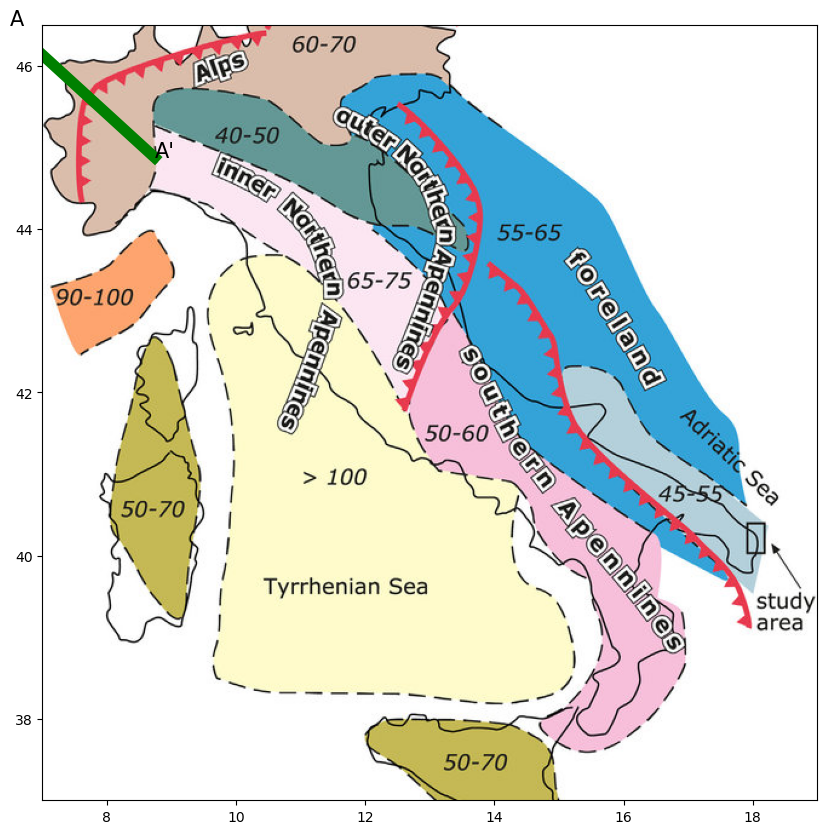

In [8]:
LON = [CLON,ELON]
LAT = [CLAT,ELAT]

im = plt.imread("img/heat_flow_italy.jpg")
plt.figure(figsize=(10,12))
xmin, xmax, ymin, ymax = (7, 19, 37, 46.5)
aspect = im.shape[0] / im.shape[1] * (xmax - xmin)/(ymax - ymin)
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)
plt.xlim(7,19)
plt.ylim(37,46.5)

plt.plot(LON, LAT, color='green', linewidth=8)
plt.text(CLON, CLAT, START_LAB, fontsize=15)
plt.text(ELON, ELAT, END_LAB, fontsize=15)
plt.show()

###  Sismicita'

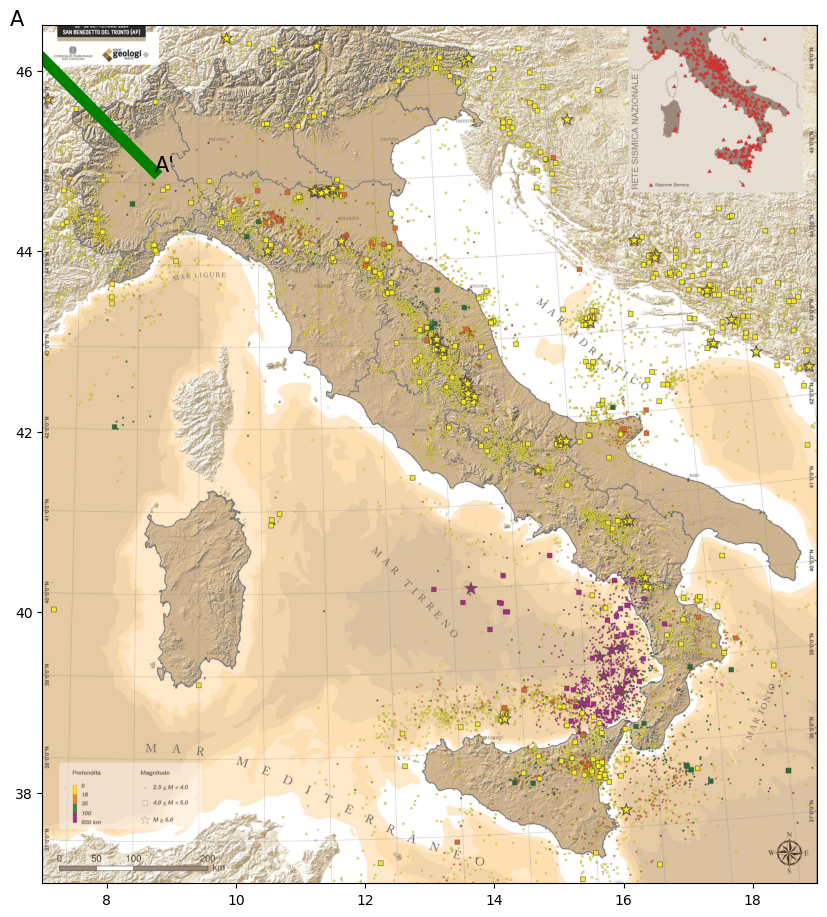

In [9]:
LON = [CLON,ELON]
LAT = [CLAT,ELAT]

im = plt.imread("img/seismicity.jpg")
plt.figure(figsize=(10,12))
xmin, xmax, ymin, ymax = (7, 19, 37, 47)
aspect = im.shape[0] / im.shape[1] * (xmax - xmin)/(ymax - ymin)
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)
plt.xlim(7,19)
plt.ylim(37,46.5)

plt.plot(LON, LAT, color='green', linewidth=8)
plt.text(CLON, CLAT, START_LAB, fontsize=15)
plt.text(ELON, ELAT, END_LAB, fontsize=15)
plt.show()

## Risultati

Dall'analisi del punto (2) confrontando la moho calcolata con quella effettiva possiamo notare che alcune zone delle Alpi Orientali non sono compensante a livello isostatico.

Nella carta gravimetrica possiamo notare un anomalia gravitazionale nelle Alpi Orientali in corrispondenza della mancanza di compensazione isostatica.



## Discussione

I modelli (tra cui modello di Airy e modello di Pratt) sono modelli isostatici che prevedono una compensazione completa, ovvero una perfetta corrispondenza tra la massa in eccesso al di sopra del livello del mare e la massa in difetto sotto la superficie.
Tuttavia la compensazione isostatica non è un principio perfetto in quanto nella maggior parte dei casi la radice ha un difetto di massa maggiore (ovvero si avrà una __supercompensazione__) o inferiore (__sottocompensazione__) rispetto alla compensazione completa.
In alcune zone, come osservato dal grafico nel punto (2), non è possibile compensare l'ispessimento crostale che si è formato con la catena montuosa.
Dai risultati dell'analisi abbiamo potuto dedurre che la topografia delle Alpi Orientali non è statica e questo può portare a un temporaneo squilibrio che si manifesta nell'anomalia gravitazionale osservata nella carta tematica al punto (3).

## Referenze
- https://www.pasqualerobustini.com/geologia/la-tettonica-delle-placche-un-pianeta-che-vive/il-principio-di-isostasia/
- https://www.researchgate.net/figure/Digital-Elevation-Model-of-the-Alps-Region_fig1_307925825
- https://gitlab.com/npa-jnotebooks/lab_geo_grav02/